In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import matplotlib.colors as colors
from mpl_toolkits import mplot3d
from math import sqrt
import warnings

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder, MinMaxScaler


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,ExtraTreesRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

import tensorflow as tf
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
from keras.wrappers.scikit_learn import KerasClassifier

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams['savefig.dpi'] = 600
plt.rcParams["savefig.format"] = 'tiff'
warnings.filterwarnings("ignore")

In [2]:
sns.set(style='whitegrid')
sns.set_context("paper", font_scale=2)


In [3]:
# Learning Rate Scheduler
def scheduler(epoch, lr):
  if epoch < 160:
    return lr
  else:
    return lr * np.exp(-0.1)

callback = keras.callbacks.LearningRateScheduler(scheduler)



# Neural Network
def Neural_network():
    init = keras.initializers.random_normal()
    model=Sequential()
    model.add(layers.Dense(64,activation='relu',kernel_initializer=init, input_dim=scaled_DF.shape[1]))
    model.add(layers.Dropout(0.1))
    

    model.add(layers.Dense(128,activation='relu',kernel_initializer=init))
    model.add(layers.Dropout(0.1))

    
    model.add(layers.Dense(128,activation='relu',kernel_initializer=init))
    model.add(layers.Dropout(0.1))

    
    model.add(layers.Dense(1,kernel_initializer=init,activation = 'linear'))
 
    
    optimize=tf.keras.optimizers.Adam()
    
    model.compile(optimizer=optimize,
                    loss='mse',
                    )
    return model

# To calclulate  Correlation and remove highly  correlated columns
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [4]:
# Funtion to train the model
def training_model(X_train,Y_train,model):
    history=model.fit(X_train,Y_train,epochs=200,batch_size=64,verbose=0,callbacks=[callback])
    return history

In [5]:
# To print losses
def plots():
    f, ax = plt.subplots(1,1)
    actual_test=np.array(scaler.inverse_transform(testY).reshape(-1,1))
    predicted_test=np.array(scaler.inverse_transform(model.predict(testX).reshape(-1,1)))

    #actual=testY
    #predicted= model.predict(testX)

    actual=np.array(scaler.inverse_transform(np.array(trainY).reshape(-1,1)))
    predicted=np.array(scaler.inverse_transform(model.predict(np.array(trainX)).reshape(-1,1)))

    sns.regplot(actual,predicted, color='midnightblue', scatter_kws={'alpha':0.5}, label='Train')
    plt.scatter(actual_test,predicted_test, color='crimson', alpha=0.5, label='Test') #linewidths=0.5, edgecolors='orange')
    
    
    print("Mean absolute error (MAE):      %f" % mean_absolute_error(actual_test,predicted_test))
    print("Mean squared error (MSE):       %f" % mean_squared_error(actual_test,predicted_test))
    print("Root mean squared error (RMSE): %f" % sqrt(mean_squared_error(actual_test,predicted_test)))
    print("R square (R^2):                 %f" % r2_score(actual_test,predicted_test))
    
    
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    #plt.suptitle("Actual Vs Predicted")
    anchored_text = AnchoredText("R\u00b2 Score_train  "+str(round(r2_score(actual,predicted),3))+'\n'"R\u00b2 Score_test  "+str(round(r2_score(actual_test,predicted_test),3)), loc=2,prop=dict(size=15))
    ax.add_artist(anchored_text)
    plt.savefig(str(model)[1:6], bbox_inches='tight')
    plt.legend(loc = 9, prop={'size': 15}) #labels=["Test","Train"], 
    plt.tight_layout()
    plt.show()

In [6]:
def defining_model(x):
    if x == 'mlr':
      model = LinearRegression()
    elif x=='adboost':
      model = AdaBoostRegressor()
    elif x=='xtratree':
      model = ExtraTreesRegressor()
    elif x=='bagging':
      model = BaggingRegressor()
    elif x=='pls':
      model = PLSRegression()
    elif x=='rndmfrst':
      model = RandomForestRegressor()
    elif x=='knn':
      model = KNeighborsRegressor()
    elif x=='svr':
      model = SVR()
    else:
      print("wrong selection")
    return model



In [7]:
# Getting data from CSV file
Train = pd.read_excel('train.xlsx')
Test = pd.read_excel('test.xlsx')
display(Train)
display(Test)

,Name of the Molecule,Solvent type,Smiles,N-Het,E(Energy),E(HOMO),E(LUMO),ꭓ(Electronegativity),µ(Chemical Potential),ɳ(Hardness),Ѡ(Electophilicity Index),d(Dipole Moment),H(Enthalpy),G(Gibbs Free Energy),Et(30)
0,n-butylammonium thiocyanate,Organic salts,[NH3+]CCCC.N#C[S-],3,-705.488062,-0.23683,-0.02673,0.131780,-0.131780,0.21010,0.001824,6.967359,-4.425787e+05,-4.426126e+05,61.4
1,1-methoxy-2-propanol,Alcohols/Phenols,CC(O)COC,2,-308.899135,-0.26058,-0.01367,0.137125,-0.137125,0.24691,0.002321,1.667483,-1.937403e+05,-1.937658e+05,48.6
2,n-butyl acetate,Esters,CC(OCCCC)=O,2,-386.366961,-0.28009,-0.01082,0.145455,-0.145455,0.26927,0.002848,2.226531,-2.423286e+05,-2.423589e+05,38.5
3,diethyl ether,"Ethers,thioethers and acetals",CCOCC,1,-233.687081,-0.25932,-0.00690,0.133110,-0.133110,0.25242,0.002236,1.207200,-1.465480e+05,-1.465716e+05,34.5
4,n-heptane,Alkanes and alkenes,CCCCCCC,0,-276.428776,-0.30669,-0.00677,0.156730,-0.156730,0.29992,0.003684,0.081600,-1.733162e+05,-1.733444e+05,30.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,isopropyl methyl ketone,Ketones,CC(C(C)C)=O,1,-271.808546,-0.25268,-0.02725,0.139965,-0.139965,0.22543,0.002208,3.009210,-1.704661e+05,-1.704917e+05,40.9
332,"1,2,3-propanetriol",Alcohols/Phenols,OCC(O)CO,3,-344.811204,-0.26286,-0.02497,0.143915,-0.143915,0.23789,0.002464,2.995709,-2.162895e+05,-2.163145e+05,57.0
333,2-bromoethanol,Alcohols/Phenols,BrCCO,2,-2726.176004,-0.28388,-0.03154,0.157710,-0.157710,0.25234,0.003138,1.998687,-1.710627e+06,-1.710650e+06,56.1
334,2-tert-butyl phenol,Alcohols/Phenols,OC1=C(C(C)(C)C)C=CC=C1,1,-464.759890,-0.22753,-0.01488,0.121205,-0.121205,0.21265,0.001562,1.210208,-2.914932e+05,-2.915227e+05,49.2


,Name of the Molecule,Solvent type,Smiles,N-Het,E(Energy),E(HOMO),E(LUMO),ꭓ(Electronegativity),µ(Chemical Potential),ɳ(Hardness),Ѡ(Electophilicity Index),d(Dipole Moment),H(Enthalpy),G(Gibbs Free Energy),Et(30)
0,N-cyanopyrrolidine,Nitrogen containing compounds,N#CN1CCCC1,2,-304.845122,-0.23917,-0.02232,0.130745,-0.130745,0.21685,0.001853,5.929909,-191205.275,-191230.348,42.6
1,1-formylpiperidine,Nitrogen containing compounds,O=CN1CCCCC1,2,-365.282365,-0.24835,-0.01670,0.132525,-0.132525,0.23165,0.002034,4.542739,-229103.577,-229128.855,41.7
2,"1,1,1-trichlorotriflouroethane",Halo-alkanes/alkenes/alkynes,ClC(Cl)(Cl)C(F)(F)F,6,-1756.325735,-0.33377,-0.06999,0.201880,-0.201880,0.26378,0.005375,0.715400,-1102074.060,-1102100.260,33.8
3,chlorobenzene,Arenes,ClC1=CC=CC=C1,1,-691.862969,-0.25555,-0.02947,0.142510,-0.142510,0.22608,0.002296,1.881700,-434082.920,-434105.664,36.8
4,di-iso-propyl sulfane,"Ethers,thioethers and acetals",CC(C)SC(C)C,1,-635.298441,-0.22008,-0.01165,0.115865,-0.115865,0.20843,0.001399,1.726400,-398524.180,-398553.092,34.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,2-picoline,Heteroarenes,CC1=NC=CC=C1,1,-287.627894,-0.25985,-0.03631,0.148080,-0.148080,0.22354,0.002451,1.966236,-180409.320,-180432.599,38.3
81,n-pentanenitrile,Nitrogen containing compounds,CCCCC#N,1,-250.718551,-0.32724,-0.01890,0.173070,-0.173070,0.30834,0.004618,4.424198,-157238.424,-157263.257,41.8
82,trichloromethane,Halo-alkanes/alkenes/alkynes,ClC(Cl)(Cl)[H],3,-1419.285512,-0.32126,-0.05982,0.190540,-0.190540,0.26144,0.004746,1.246500,-890585.830,-890606.924,39.1
83,4-chloro-3-methylphenol,Alcohols/Phenols,OC1=CC(C)=C(Cl)C=C1,2,-806.409087,-0.23093,-0.02612,0.128525,-0.128525,0.20481,0.001692,1.789384,-505939.034,-505965.767,51.0


In [8]:
# Combine Train and test for feature engineering
DF = pd.concat([Train,Test],ignore_index=True)
DF_data = DF.copy()
DF

,Name of the Molecule,Solvent type,Smiles,N-Het,E(Energy),E(HOMO),E(LUMO),ꭓ(Electronegativity),µ(Chemical Potential),ɳ(Hardness),Ѡ(Electophilicity Index),d(Dipole Moment),H(Enthalpy),G(Gibbs Free Energy),Et(30)
0,n-butylammonium thiocyanate,Organic salts,[NH3+]CCCC.N#C[S-],3,-705.488062,-0.23683,-0.02673,0.131780,-0.131780,0.21010,0.001824,6.967359,-442578.6500,-442612.6090,61.4
1,1-methoxy-2-propanol,Alcohols/Phenols,CC(O)COC,2,-308.899135,-0.26058,-0.01367,0.137125,-0.137125,0.24691,0.002321,1.667483,-193740.2640,-193765.7950,48.6
2,n-butyl acetate,Esters,CC(OCCCC)=O,2,-386.366961,-0.28009,-0.01082,0.145455,-0.145455,0.26927,0.002848,2.226531,-242328.6371,-242358.9014,38.5
3,diethyl ether,"Ethers,thioethers and acetals",CCOCC,1,-233.687081,-0.25932,-0.00690,0.133110,-0.133110,0.25242,0.002236,1.207200,-146548.0340,-146571.6130,34.5
4,n-heptane,Alkanes and alkenes,CCCCCCC,0,-276.428776,-0.30669,-0.00677,0.156730,-0.156730,0.29992,0.003684,0.081600,-173316.1830,-173344.3810,30.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,2-picoline,Heteroarenes,CC1=NC=CC=C1,1,-287.627894,-0.25985,-0.03631,0.148080,-0.148080,0.22354,0.002451,1.966236,-180409.3200,-180432.5990,38.3
417,n-pentanenitrile,Nitrogen containing compounds,CCCCC#N,1,-250.718551,-0.32724,-0.01890,0.173070,-0.173070,0.30834,0.004618,4.424198,-157238.4240,-157263.2570,41.8
418,trichloromethane,Halo-alkanes/alkenes/alkynes,ClC(Cl)(Cl)[H],3,-1419.285512,-0.32126,-0.05982,0.190540,-0.190540,0.26144,0.004746,1.246500,-890585.8300,-890606.9240,39.1
419,4-chloro-3-methylphenol,Alcohols/Phenols,OC1=CC(C)=C(Cl)C=C1,2,-806.409087,-0.23093,-0.02612,0.128525,-0.128525,0.20481,0.001692,1.789384,-505939.0340,-505965.7670,51.0


In [9]:
DF_data.columns

Index(['Name of the Molecule', 'Solvent type', 'Smiles', 'N-Het', 'E(Energy)',
       'E(HOMO)', 'E(LUMO)', 'ꭓ(Electronegativity)', 'µ(Chemical Potential)',
       'ɳ(Hardness)', 'Ѡ(Electophilicity Index)', 'd(Dipole Moment)',
       'H(Enthalpy)', 'G(Gibbs Free Energy)', 'Et(30)'],
      dtype='object')

In [10]:
# Removing Unwanted columns
DF_data=DF_data.drop(['Name of the Molecule','Smiles'],axis=1)
#DF_data

In [11]:
# Dropping highly correlated Features
corr_features = correlation(DF_data, 0.80)
print("No. of features to drop : ",len(set(corr_features)))

DF_data.drop(corr_features,axis=1,inplace=True)

No. of features to drop :  6


In [12]:
DF_data

,Solvent type,N-Het,E(Energy),E(HOMO),E(LUMO),d(Dipole Moment),Et(30)
0,Organic salts,3,-705.488062,-0.23683,-0.02673,6.967359,61.4
1,Alcohols/Phenols,2,-308.899135,-0.26058,-0.01367,1.667483,48.6
2,Esters,2,-386.366961,-0.28009,-0.01082,2.226531,38.5
3,"Ethers,thioethers and acetals",1,-233.687081,-0.25932,-0.00690,1.207200,34.5
4,Alkanes and alkenes,0,-276.428776,-0.30669,-0.00677,0.081600,30.9
...,...,...,...,...,...,...,...
416,Heteroarenes,1,-287.627894,-0.25985,-0.03631,1.966236,38.3
417,Nitrogen containing compounds,1,-250.718551,-0.32724,-0.01890,4.424198,41.8
418,Halo-alkanes/alkenes/alkynes,3,-1419.285512,-0.32126,-0.05982,1.246500,39.1
419,Alcohols/Phenols,2,-806.409087,-0.23093,-0.02612,1.789384,51.0


In [13]:
DF_data.columns

Index(['Solvent type', 'N-Het', 'E(Energy)', 'E(HOMO)', 'E(LUMO)',
       'd(Dipole Moment)', 'Et(30)'],
      dtype='object')

In [14]:
DF_data

,Solvent type,N-Het,E(Energy),E(HOMO),E(LUMO),d(Dipole Moment),Et(30)
0,Organic salts,3,-705.488062,-0.23683,-0.02673,6.967359,61.4
1,Alcohols/Phenols,2,-308.899135,-0.26058,-0.01367,1.667483,48.6
2,Esters,2,-386.366961,-0.28009,-0.01082,2.226531,38.5
3,"Ethers,thioethers and acetals",1,-233.687081,-0.25932,-0.00690,1.207200,34.5
4,Alkanes and alkenes,0,-276.428776,-0.30669,-0.00677,0.081600,30.9
...,...,...,...,...,...,...,...
416,Heteroarenes,1,-287.627894,-0.25985,-0.03631,1.966236,38.3
417,Nitrogen containing compounds,1,-250.718551,-0.32724,-0.01890,4.424198,41.8
418,Halo-alkanes/alkenes/alkynes,3,-1419.285512,-0.32126,-0.05982,1.246500,39.1
419,Alcohols/Phenols,2,-806.409087,-0.23093,-0.02612,1.789384,51.0


In [15]:

# Scaling the whole DataFrame



scaler = StandardScaler()
scaled_DF = pd.DataFrame(scaler.fit_transform(DF_data.iloc[:,2:6]))
scaled_DF.columns = DF_data.iloc[:,2:6].columns

scaled_DF['Et(30)'] = scaler.fit_transform(np.array(DF_data['Et(30)']).reshape(-1,1))
scaled_DF

display(scaled_DF)

,E(Energy),E(HOMO),E(LUMO),d(Dipole Moment),Et(30)
0,-0.023105,0.734769,-0.026437,2.013377,2.691344
1,0.430149,0.017788,0.614075,-0.381284,0.901168
2,0.341612,-0.571193,0.753849,-0.128687,-0.511394
3,0.516107,0.055826,0.946101,-0.589255,-1.070824
4,0.467259,-1.374211,0.952477,-1.097838,-1.574311
...,...,...,...,...,...
416,0.454459,0.039826,-0.496276,-0.246297,-0.539365
417,0.496642,-1.994588,0.357576,0.864292,-0.049864
418,-0.838889,-1.814060,-1.649294,-0.571498,-0.427479
419,-0.138445,0.912882,0.003480,-0.326205,1.236826


In [16]:
DF_target = scaled_DF[['Et(30)']]
scaled_DF.drop('Et(30)',axis=1,inplace=True)

display(scaled_DF)
display(DF_target)

,E(Energy),E(HOMO),E(LUMO),d(Dipole Moment)
0,-0.023105,0.734769,-0.026437,2.013377
1,0.430149,0.017788,0.614075,-0.381284
2,0.341612,-0.571193,0.753849,-0.128687
3,0.516107,0.055826,0.946101,-0.589255
4,0.467259,-1.374211,0.952477,-1.097838
...,...,...,...,...
416,0.454459,0.039826,-0.496276,-0.246297
417,0.496642,-1.994588,0.357576,0.864292
418,-0.838889,-1.814060,-1.649294,-0.571498
419,-0.138445,0.912882,0.003480,-0.326205


,Et(30)
0,2.691344
1,0.901168
2,-0.511394
3,-1.070824
4,-1.574311
...,...
416,-0.539365
417,-0.049864
418,-0.427479
419,1.236826


In [17]:
DF_data.columns.values

array(['Solvent type', 'N-Het', 'E(Energy)', 'E(HOMO)', 'E(LUMO)',
       'd(Dipole Moment)', 'Et(30)'], dtype=object)

In [18]:
scaled_DF[['N-Het']] = DF_data[['N-Het']]

In [19]:
scaled_DF

,E(Energy),E(HOMO),E(LUMO),d(Dipole Moment),N-Het
0,-0.023105,0.734769,-0.026437,2.013377,3
1,0.430149,0.017788,0.614075,-0.381284,2
2,0.341612,-0.571193,0.753849,-0.128687,2
3,0.516107,0.055826,0.946101,-0.589255,1
4,0.467259,-1.374211,0.952477,-1.097838,0
...,...,...,...,...,...
416,0.454459,0.039826,-0.496276,-0.246297,1
417,0.496642,-1.994588,0.357576,0.864292,1
418,-0.838889,-1.814060,-1.649294,-0.571498,3
419,-0.138445,0.912882,0.003480,-0.326205,2


In [20]:
scaled_DF[['Solvent type']] = DF_data[['Solvent type']]


In [21]:
scaled_DF

,E(Energy),E(HOMO),E(LUMO),d(Dipole Moment),N-Het,Solvent type
0,-0.023105,0.734769,-0.026437,2.013377,3,Organic salts
1,0.430149,0.017788,0.614075,-0.381284,2,Alcohols/Phenols
2,0.341612,-0.571193,0.753849,-0.128687,2,Esters
3,0.516107,0.055826,0.946101,-0.589255,1,"Ethers,thioethers and acetals"
4,0.467259,-1.374211,0.952477,-1.097838,0,Alkanes and alkenes
...,...,...,...,...,...,...
416,0.454459,0.039826,-0.496276,-0.246297,1,Heteroarenes
417,0.496642,-1.994588,0.357576,0.864292,1,Nitrogen containing compounds
418,-0.838889,-1.814060,-1.649294,-0.571498,3,Halo-alkanes/alkenes/alkynes
419,-0.138445,0.912882,0.003480,-0.326205,2,Alcohols/Phenols


In [22]:
scaled_DF = pd.get_dummies(scaled_DF)

In [23]:
scaled_DF

,E(Energy),E(HOMO),E(LUMO),d(Dipole Moment),N-Het,Solvent type_Alcohols/Phenols,Solvent type_Alkanes and alkenes,Solvent type_Arenes,Solvent type_Carboxylic acids/anhydrides,Solvent type_Esters,"Solvent type_Ethers,thioethers and acetals",Solvent type_Halo-alkanes/alkenes/alkynes,Solvent type_Heteroarenes,Solvent type_Ketones,Solvent type_Nitrogen containing compounds,Solvent type_Organic salts,Solvent type_Phosphorous compounds,Solvent type_Sulphur compounds
0,-0.023105,0.734769,-0.026437,2.013377,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.430149,0.017788,0.614075,-0.381284,2,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0.341612,-0.571193,0.753849,-0.128687,2,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0.516107,0.055826,0.946101,-0.589255,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0.467259,-1.374211,0.952477,-1.097838,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,0.454459,0.039826,-0.496276,-0.246297,1,0,0,0,0,0,0,0,1,0,0,0,0,0
417,0.496642,-1.994588,0.357576,0.864292,1,0,0,0,0,0,0,0,0,0,1,0,0,0
418,-0.838889,-1.814060,-1.649294,-0.571498,3,0,0,0,0,0,0,1,0,0,0,0,0,0
419,-0.138445,0.912882,0.003480,-0.326205,2,1,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
scaled_DF.describe()

,E(Energy),E(HOMO),E(LUMO),d(Dipole Moment),N-Het,Solvent type_Alcohols/Phenols,Solvent type_Alkanes and alkenes,Solvent type_Arenes,Solvent type_Carboxylic acids/anhydrides,Solvent type_Esters,"Solvent type_Ethers,thioethers and acetals",Solvent type_Halo-alkanes/alkenes/alkynes,Solvent type_Heteroarenes,Solvent type_Ketones,Solvent type_Nitrogen containing compounds,Solvent type_Organic salts,Solvent type_Phosphorous compounds,Solvent type_Sulphur compounds
count,4.210000e+02,4.210000e+02,4.210000e+02,4.210000e+02,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000
mean,9.163955e-17,-1.265812e-15,-1.231530e-16,-5.300590e-17,1.985748,0.247031,0.038005,0.068884,0.009501,0.085511,0.111639,0.102138,0.038005,0.042755,0.173397,0.042755,0.016627,0.023753
std,1.001190e+00,1.001190e+00,1.001190e+00,1.001190e+00,1.407391,0.431798,0.191435,0.253557,0.097125,0.279973,0.315296,0.303190,0.191435,0.202546,0.379040,0.202546,0.128022,0.152460
min,-8.078548e+00,-2.779192e+00,-4.456068e+00,-1.134708e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.707235e-02,-6.176831e-01,-3.334504e-01,-5.183396e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.402768e-01,7.424118e-02,4.174094e-01,-2.844933e-01,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.333975e-01,6.695618e-01,6.773412e-01,2.782646e-01,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.122600e-01,3.431523e+00,1.626338e+00,5.828362e+00,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
trainX = scaled_DF[:len(Train)] 
testX = scaled_DF[len(Train):]

trainY = DF_target[:len(Train)]
testY = DF_target[len(Train):]

Average validation R2 score after crossvalidation :  0.664399577466969
Average validation rmse score after crossvalidation :  4.133720295296042


Training Accuracy :  0.7143726538493682
Mean absolute error (MAE):      2.639916
Mean squared error (MSE):       12.021449
Root mean squared error (RMSE): 3.467196
R square (R^2):                 0.735010


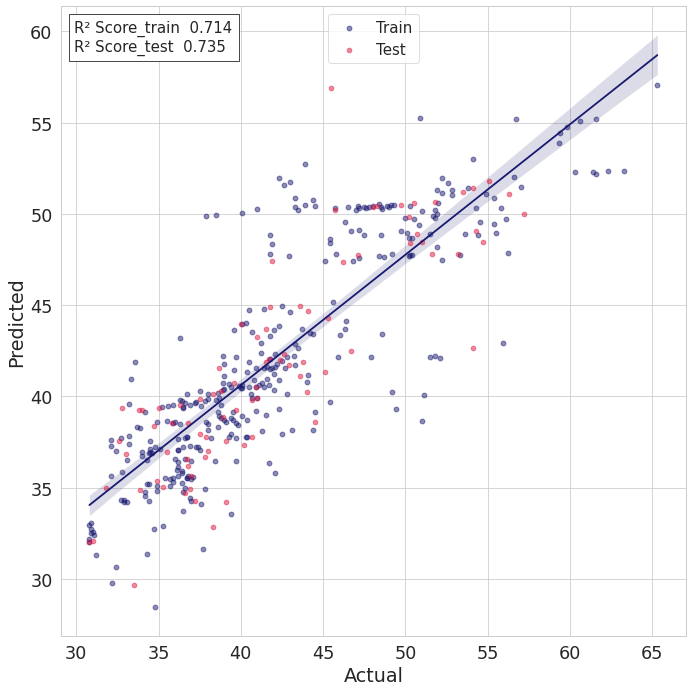

In [26]:
# Multiple Linear Regression
model = defining_model(x = 'mlr')

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

scores = []
rmse = []
for train,valid in kfold.split(trainX,trainY):
  model.fit(trainX.iloc[train],trainY.iloc[train])
  scores.append(model.score(trainX.iloc[valid],trainY.iloc[valid]))
  actual = trainY.iloc[valid]
  predicted = model.predict(trainX.iloc[valid])
  rmse.append(sqrt(mean_squared_error(scaler.inverse_transform(actual),scaler.inverse_transform(predicted))))
# Unscaled

print("Average validation R2 score after crossvalidation : ", np.mean(scores))
print("Average validation rmse score after crossvalidation : ", np.mean(rmse))

# Train model on whole train data
model = defining_model(x = 'mlr')
model.fit(trainX,trainY)
print("\n\nTraining Accuracy : ",model.score(trainX,trainY)) # Training Accuracy
plots()

Average validation R2 score after crossvalidation :  0.6583839026756773
Average validation rmse score after crossvalidation :  4.196528779535496


Training Accuracy :  0.7994289348587652
Mean absolute error (MAE):      2.276941
Mean squared error (MSE):       10.069068
Root mean squared error (RMSE): 3.173180
R square (R^2):                 0.778046


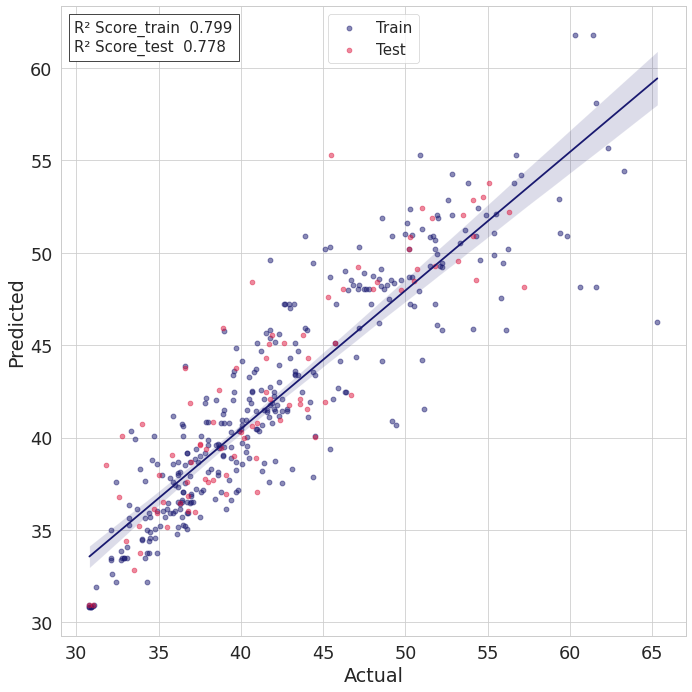

In [27]:
# KNN
model = defining_model(x = 'knn')

kfold = KFold(n_splits=5, shuffle=False)

scores = []
rmse = []
for train,valid in kfold.split(trainX,trainY):
  model.fit(trainX.iloc[train],trainY.iloc[train])
  scores.append(model.score(trainX.iloc[valid],trainY.iloc[valid]))
  actual = trainY.iloc[valid]
  predicted = model.predict(trainX.iloc[valid])
  rmse.append(sqrt(mean_squared_error(scaler.inverse_transform(actual),scaler.inverse_transform(predicted))))
# Unscaled

print("Average validation R2 score after crossvalidation : ", np.mean(scores))
print("Average validation rmse score after crossvalidation : ", np.mean(rmse))

# Train model on whole train data
model = defining_model(x = 'knn')
model.fit(trainX,trainY)
print("\n\nTraining Accuracy : ",model.score(trainX,trainY)) # Training Accuracy
plots()

Average validation R2 score after crossvalidation :  0.6960623402351883
Average validation rmse score after crossvalidation :  3.9772048858347646


Training Accuracy :  0.798506095582669
Mean absolute error (MAE):      1.870828
Mean squared error (MSE):       7.981159
Root mean squared error (RMSE): 2.825094
R square (R^2):                 0.824070


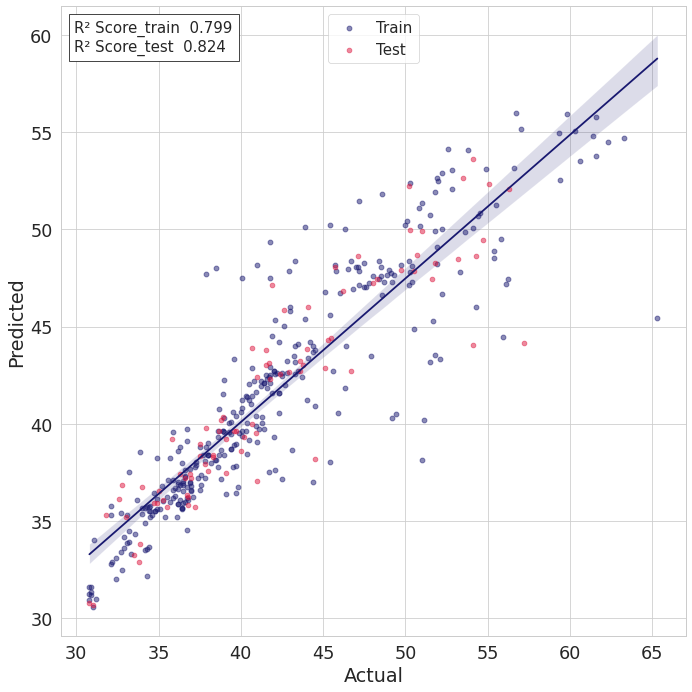

In [28]:
# Support Vector Regressor
model = defining_model(x = 'svr')

kfold = KFold(n_splits=5, shuffle=False)

scores = []
rmse = []
for train,valid in kfold.split(trainX,trainY):
  model.fit(trainX.iloc[train],trainY.iloc[train])
  scores.append(model.score(trainX.iloc[valid],trainY.iloc[valid]))
  actual = trainY.iloc[valid]
  predicted = model.predict(trainX.iloc[valid])
  rmse.append(sqrt(mean_squared_error(scaler.inverse_transform(actual),scaler.inverse_transform(predicted.reshape(-1,1)))))
# Unscaled

print("Average validation R2 score after crossvalidation : ", np.mean(scores))
print("Average validation rmse score after crossvalidation : ", np.mean(rmse))

# Train model on whole train data
model = defining_model(x = 'svr')
model.fit(trainX,trainY)
print("\n\nTraining Accuracy : ",model.score(trainX,trainY)) # Training Accuracy
plots()

Average validation R2 score after crossvalidation :  0.6588298392419574
Average validation rmse score after crossvalidation :  4.157539256600673


Training Accuracy :  0.718536991828647
Mean absolute error (MAE):      3.555668
Mean squared error (MSE):       16.491361
Root mean squared error (RMSE): 4.060956
R square (R^2):                 0.636479


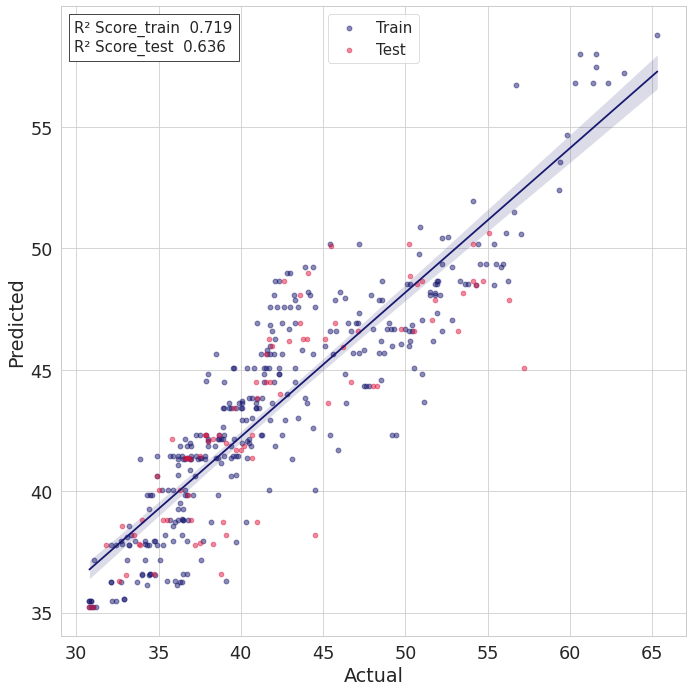

In [29]:
#Adaboost
model = defining_model(x = 'adboost')
kfold = KFold(n_splits=5, shuffle=False)

scores = []
rmse = []
for train,valid in kfold.split(trainX,trainY):
  model.fit(trainX.iloc[train],trainY.iloc[train])
  scores.append(model.score(trainX.iloc[valid],trainY.iloc[valid]))
  actual = trainY.iloc[valid]
  predicted = model.predict(trainX.iloc[valid])
  rmse.append(sqrt(mean_squared_error(scaler.inverse_transform(actual),scaler.inverse_transform(predicted.reshape(-1,1)))))

print("Average validation R2 score after crossvalidation : ", np.mean(scores))
print("Average validation rmse score after crossvalidation : ", np.mean(rmse))


# Train model on whole train data
model = defining_model(x = 'adboost')
model.fit(trainX,trainY)
print("\n\nTraining Accuracy : ",model.score(trainX,trainY)) # Training Accuracy
plots()

Average validation R2 score after crossvalidation :  0.8299233742061756
Average validation rmse score after crossvalidation :  2.928104651479006


Training Accuracy :  1.0
Mean absolute error (MAE):      1.357224
Mean squared error (MSE):       3.641470
Root mean squared error (RMSE): 1.908263
R square (R^2):                 0.919731


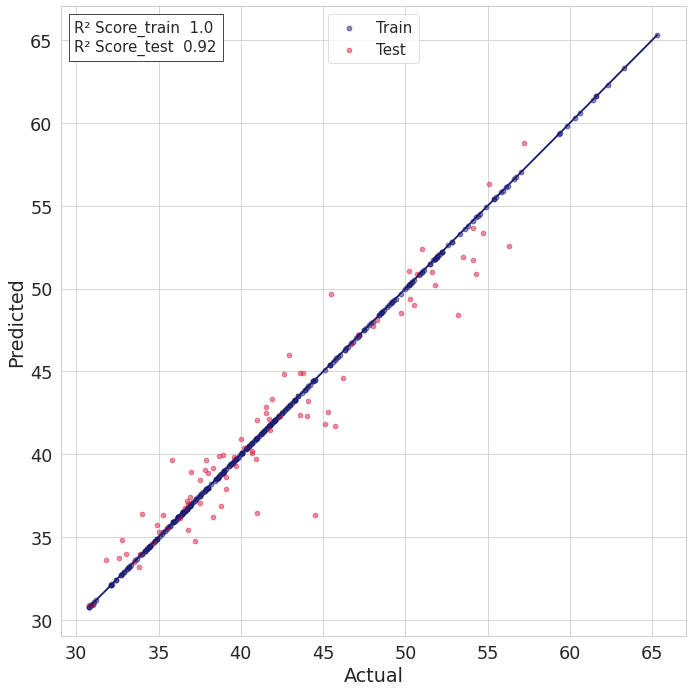

In [30]:
# Extra Tree Regressor
model = defining_model(x = 'xtratree')
kfold = KFold(n_splits=5, shuffle=True)

scores = []
rmse = []
for train,valid in kfold.split(trainX,trainY):
  model.fit(trainX.iloc[train],trainY.iloc[train])
  scores.append(model.score(trainX.iloc[valid],trainY.iloc[valid]))
  actual = trainY.iloc[valid]
  predicted = model.predict(trainX.iloc[valid])
  rmse.append(sqrt(mean_squared_error(scaler.inverse_transform(actual),scaler.inverse_transform(predicted.reshape(-1,1)))))

print("Average validation R2 score after crossvalidation : ", np.mean(scores))
print("Average validation rmse score after crossvalidation : ", np.mean(rmse))


# Train model on whole train data
model = defining_model(x = 'xtratree')
model.fit(trainX,trainY)
print("\n\nTraining Accuracy : ",model.score(trainX,trainY)) # Training Accuracy
plots()

Average validation R2 score after crossvalidation :  0.7457700861215988
Average validation rmse score after crossvalidation :  3.573704168148602


Training Accuracy :  0.9642902408933618
Mean absolute error (MAE):      1.906118
Mean squared error (MSE):       7.390859
Root mean squared error (RMSE): 2.718613
R square (R^2):                 0.837082


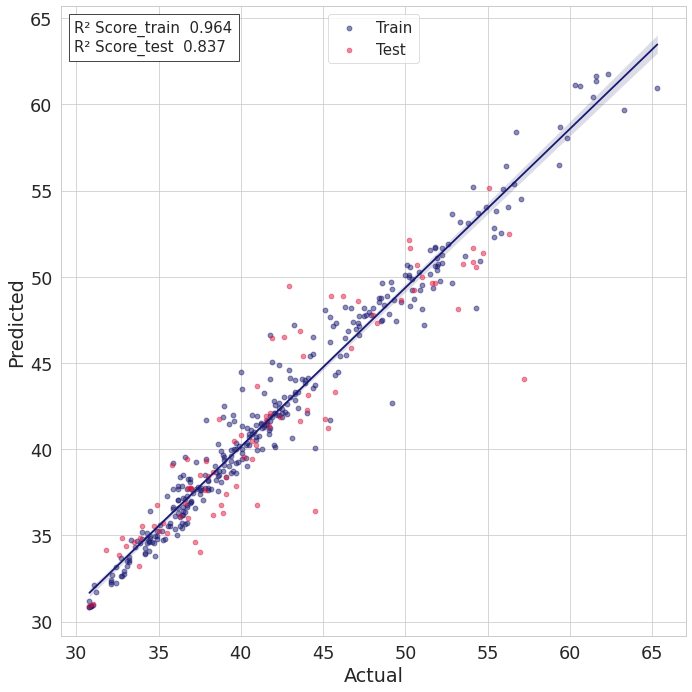

In [31]:
# Bagging Regressor
model = defining_model(x = 'bagging')
kfold = KFold(n_splits=5, shuffle=False)

scores = []
rmse = []
for train,valid in kfold.split(trainX,trainY):
  model.fit(trainX.iloc[train],trainY.iloc[train])
  scores.append(model.score(trainX.iloc[valid],trainY.iloc[valid]))
  actual = trainY.iloc[valid]
  predicted = model.predict(trainX.iloc[valid])
  rmse.append(sqrt(mean_squared_error(scaler.inverse_transform(actual),scaler.inverse_transform(predicted.reshape(-1,1)))))

print("Average validation R2 score after crossvalidation : ", np.mean(scores))
print("Average validation rmse score after crossvalidation : ", np.mean(rmse))

# Train model on whole train data
model = defining_model(x = 'bagging')
model.fit(trainX,trainY)
print("\n\nTraining Accuracy : ",model.score(trainX,trainY)) # Training Accuracy
plots()

Average validation R2 score after crossvalidation :  0.7892966307130307
Average validation rmse score after crossvalidation :  3.248248943302343


Training Accuracy :  0.9727588439171049
Mean absolute error (MAE):      1.784871
Mean squared error (MSE):       7.059316
Root mean squared error (RMSE): 2.656937
R square (R^2):                 0.844391


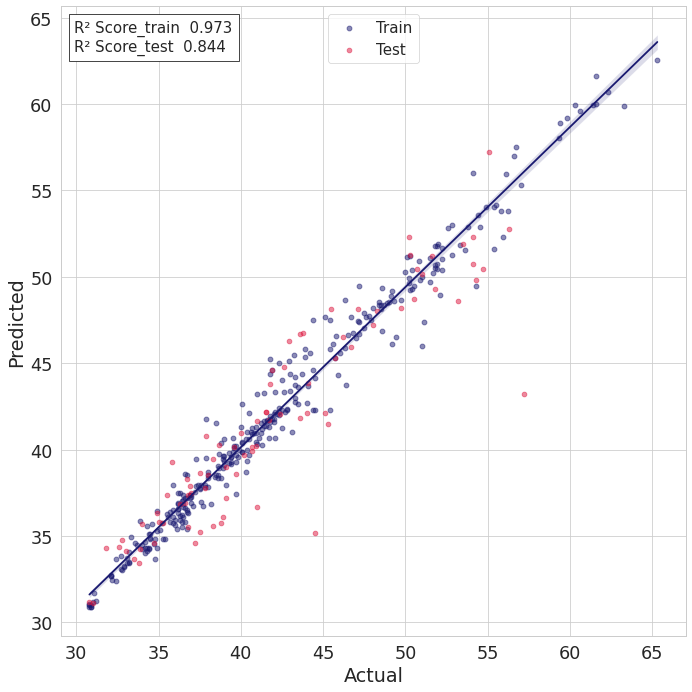

In [32]:
# Random Forest
model = defining_model(x = 'rndmfrst')
kfold = KFold(n_splits=5, shuffle=False)

scores = []
rmse = []
for train,valid in kfold.split(trainX,trainY):
  model.fit(trainX.iloc[train],trainY.iloc[train])
  scores.append(model.score(trainX.iloc[valid],trainY.iloc[valid]))
  actual = trainY.iloc[valid]
  predicted = model.predict(trainX.iloc[valid])
  rmse.append(sqrt(mean_squared_error(scaler.inverse_transform(actual),scaler.inverse_transform(predicted.reshape(-1,1)))))

print("Average validation R2 score after crossvalidation : ", np.mean(scores))
print("Average validation rmse score after crossvalidation : ", np.mean(rmse))


# Train model on whole train data
model = defining_model(x = 'rndmfrst')
model.fit(trainX,trainY)
print("\n\nTraining Accuracy : ",model.score(trainX,trainY)) # Training Accuracy
plots()

Average validation R2 score after crossvalidation :  0.6585389950238097
Average validation rmse score after crossvalidation :  4.176773022847175


Training Accuracy :  0.7013606793822207
Mean absolute error (MAE):      2.632792
Mean squared error (MSE):       12.650931
Root mean squared error (RMSE): 3.556815
R square (R^2):                 0.721134


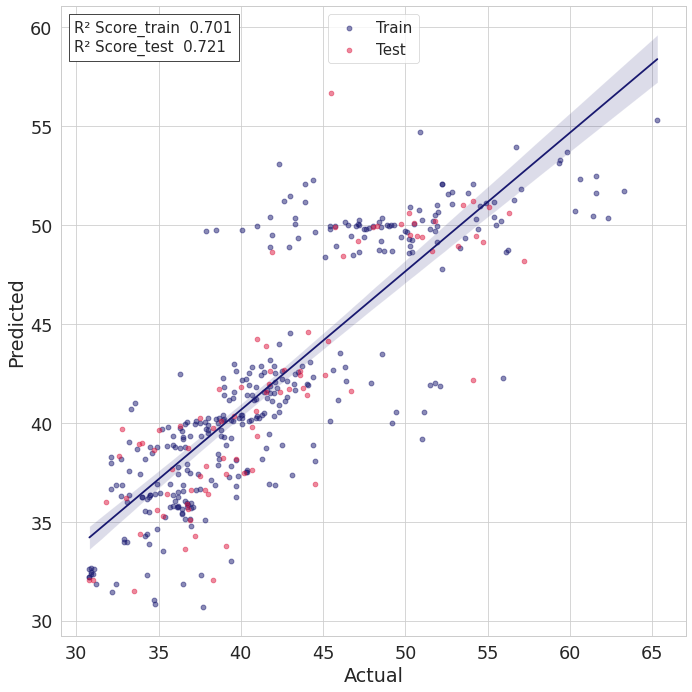

In [33]:
# Partial Least Square
model = defining_model(x = 'pls')

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

scores = []
rmse = []
for train,valid in kfold.split(trainX,trainY):
  model.fit(trainX.iloc[train],trainY.iloc[train])
  scores.append(model.score(trainX.iloc[valid],trainY.iloc[valid]))
  actual = trainY.iloc[valid]
  predicted = model.predict(trainX.iloc[valid])
  rmse.append(sqrt(mean_squared_error(scaler.inverse_transform(actual),scaler.inverse_transform(predicted))))
# Unscaled

print("Average validation R2 score after crossvalidation : ", np.mean(scores))
print("Average validation rmse score after crossvalidation : ", np.mean(rmse))

# Train model on whole train data
model = defining_model(x = 'pls')
model.fit(trainX,trainY)
print("\n\nTraining Accuracy : ",model.score(trainX,trainY)) # Training Accuracy
plots()

2022-05-18 18:31:28.297270: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-05-18 18:31:28.297669: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-18 18:31:28.299167: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-05-18 18:31:28.421149: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-05-18 18:31:28.441445: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3600000000 Hz


Average validation R2 score after crossvalidation :  0.9097390798808578
Average validation rmse score after crossvalidation :  1.9640339801092583


Training Accuracy :  0.9473658466135507
Mean absolute error (MAE):      1.358560
Mean squared error (MSE):       3.406878
Root mean squared error (RMSE): 1.845773
R square (R^2):                 0.924902


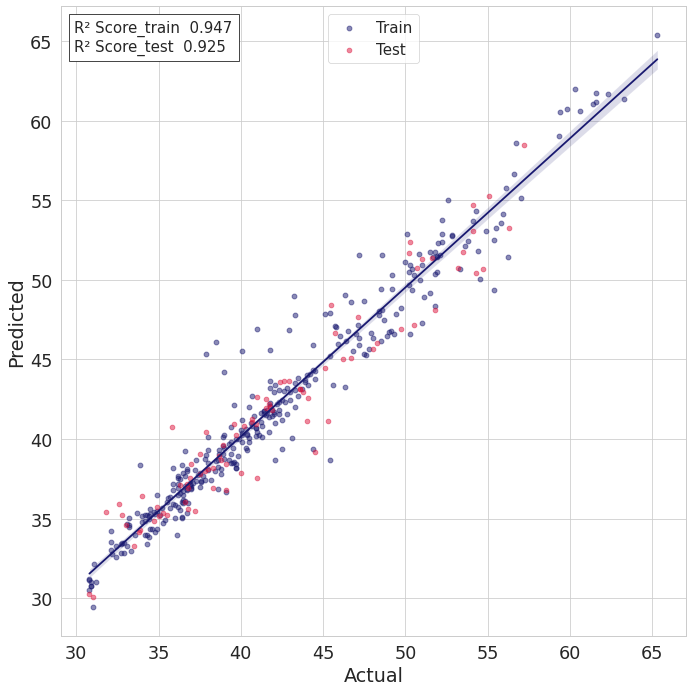

In [34]:
model = Neural_network()

kfold = KFold(n_splits=5, shuffle=True, random_state=1500)

best_score = 0.1

scores = []
rmse = []
for train,valid in kfold.split(trainX,trainY):
  training_model(trainX.iloc[train],trainY.iloc[train],model)
  scores.append(r2_score(trainY.iloc[valid],model.predict(trainX.iloc[valid])))
  
  actual = trainY.iloc[valid]
  predicted = model.predict(trainX.iloc[valid])
  rmse.append(sqrt(mean_squared_error(scaler.inverse_transform(actual),scaler.inverse_transform(predicted))))
    
print("Average validation R2 score after crossvalidation : ", np.mean(scores))
print("Average validation rmse score after crossvalidation : ", np.mean(rmse))

# Train model on whole train data

model = Neural_network()
training_model(trainX,trainY,model)
#actual = trainY
#predicted = model.predict(trainX)

actual=np.array(scaler.inverse_transform(np.array(trainY)))
predicted=np.array(scaler.inverse_transform(model.predict(np.array(trainX)).reshape(-1,1)))
model.save("nn.h5")
score = r2_score(actual,predicted)
print("\n\nTraining Accuracy : ",score) # Training Accuracy
plots()

In [35]:
actual_test=np.array(scaler.inverse_transform(testY).reshape(-1,1))
predicted_test=np.array(scaler.inverse_transform(model.predict(testX).reshape(-1,1)))

In [36]:
predictions_DF = Test[['Name of the Molecule','Solvent type']]
predictions_DF['Actual'] = np.squeeze(actual_test)
predictions_DF['Predicted'] = np.squeeze(predicted_test)

In [37]:
predictions_DF.to_excel('predictions.xlsx',index = False)

In [38]:
predictions_DF = Train[['Name of the Molecule','Solvent type']]
predictions_DF['Actual'] = np.squeeze(actual)
predictions_DF['Predicted'] = np.squeeze(predicted)

In [39]:
predictions_DF.to_excel('predictions_train.xlsx',index = False)